# accessing data

In [290]:
# !ls
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install xarray
# !pip install gcsfs
# !pip install tqdm
# !pip install numpy


In [36]:
import pandas as pd

df = pd.read_csv("/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/FPA-FOD_reduced.csv", low_memory = False)
df = df.drop('Unnamed: 0', axis = 'columns') #drops the items where columns are unnamed

# Processing data

In [5]:
unknown_mask = df['NWCG_GENERAL_CAUSE'] == "Missing data/not specified/undetermined"

df_known = df[~unknown_mask].copy()
df_unknown = df[unknown_mask].copy()

In [6]:
#turn NDVI into separate columns

ndvi_split = df_known['NDVI_mean'].str.split(' ', expand=True)
ndvi_split.columns = [f"NDVI{k+1}" for k in range(ndvi_split.shape[1])]
df2 = pd.concat([df_known, ndvi_split], axis=1)
ndvi_cols = [f"NDVI{k+1}" for k in range(12)]
for col in ndvi_cols:
    df2[col] = df2[col].str.strip("'\"")  # Remove single or double quotes
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # Convert to float, coercing errors
df2.head()

,pr,tmmn,tmmx,rmin,rmax,sph,srad,etr,vpd,bi,...,NDVI3,NDVI4,NDVI5,NDVI6,NDVI7,NDVI8,NDVI9,NDVI10,NDVI11,NDVI12
1,0.0,269.299988,281.799988,36.700001,92.099998,0.00282,129.100006,2.2,0.35,28.0,...,0.35,0.31,0.26,0.28,0.36,0.40,0.31,0.19,0.16,0.19
2,0.0,276.500000,287.299988,41.799999,90.000000,0.00448,132.900009,3.6,0.47,38.0,...,0.39,0.47,0.53,0.53,0.49,0.52,0.32,0.20,0.32,0.38
3,0.0,275.100006,286.700012,23.900000,75.200005,0.00323,144.300003,3.1,0.61,29.0,...,0.26,0.23,0.23,0.26,0.24,0.20,0.21,0.16,0.14,0.22
4,0.9,288.299988,300.299988,49.000000,98.200005,0.01116,109.500000,4.5,0.85,0.0,...,0.31,0.28,0.22,0.21,0.25,0.36,0.29,0.33,0.31,0.31
6,0.0,269.600006,282.399994,29.100000,79.700005,0.00250,136.900009,2.7,0.44,34.0,...,0.23,0.25,0.19,0.20,0.20,0.20,0.20,0.15,0.16,0.17


In [7]:
X = df2.drop(columns=['NWCG_GENERAL_CAUSE', 'NDVI_mean'])
y = df2['NWCG_GENERAL_CAUSE']

In [8]:
X = X.fillna(X.median(numeric_only=True)) #replace NANs

for col in X.columns: #convert numeric values to floats, if possible
    if X[col].dtype == 'object':
        # try converting to float — if it works, keep it numeric
        try:
            X[col] = X[col].astype(float)
        except ValueError:
            pass

# X.dtypes

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y) #encode the textual output

# Splitting the data into train and test sets

In [ ]:
# from sklearn.model_selection import train_test_split

# # Combine X and y into one DataFrame temporarily
# df3 = X.copy()

# df3['cause'] = y_encoded

# # Split back into X and y
# X = df3.drop(columns=['cause'])
# y = df3['cause']

# # Now do your train-test split as usual
# X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# if isinstance(y_train_df, pd.Series):
#     y_train_df = y_train_df.to_frame(name='cause')

# if isinstance(y_test_df, pd.Series):
#     y_test_df = y_test_df.to_frame(name='cause')


(1363952, 43) (340988, 43)
Index(['pr', 'tmmn', 'tmmx', 'rmin', 'rmax', 'sph', 'srad', 'etr', 'vpd', 'bi',
       'erc', 'fm100', 'fm1000', 'EVC', 'EVT', 'EVH', 'Elevation', 'Slope',
       'Aspect', 'TRI', 'TPI', 'Aridity_index', 'Population', 'GDP',
       'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_YEAR',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NDVI1', 'NDVI2', 'NDVI3', 'NDVI4',
       'NDVI5', 'NDVI6', 'NDVI7', 'NDVI8', 'NDVI9', 'NDVI10', 'NDVI11',
       'NDVI12'],
      dtype='object')
cause
1        428414
6        261814
0        256539
2        152150
10        79570
5         53022
11        51016
9         29828
8         26122
4         14878
7          8413
3          2186
Name: count, dtype: int64


### Evenly Balanced Size Reduction

In [ ]:
# from sklearn.model_selection import train_test_split

# # Combine X and y into one DataFrame temporarily
# df2 = X.copy()

# df2['cause'] = y_encoded

# df_balanced = (
#     df2.groupby('cause', group_keys=False)
#       .apply(lambda x: x.sample(n=min(len(x), 10000), random_state=42))
#       .reset_index(drop=True)
# )

# # Split back into X and y
# X_balanced = df_balanced.drop(columns=['cause'])
# y_balanced = df_balanced['cause']

# # Now do your train-test split as usual
# df_known, X_test_df, y_train_df, y_test_df = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )

# print(X_train_df.shape, X_test_df.shape)
# print(y_train_df.value_counts())

/var/folders/9p/1xc4qsqs6wv7ng86fqksqfrr0000gn/T/ipykernel_87485/731912646.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2.groupby('cause', group_keys=False)


(90186, 32) (22547, 32)
cause
11    8000
6     8000
10    8000
8     8000
0     8000
7     8000
2     8000
4     8000
1     8000
5     8000
9     8000
3     2186
Name: count, dtype: int64


### Size Reduction by initial distribution

In [ ]:
from sklearn.model_selection import train_test_split

# Combine X and y
df3 = X.copy()
df3['cause'] = y_encoded

# Calculate per-class limits (as you did before)
limits = (df3['cause'].value_counts() / 10).round(0)

# Sample per-class, capped at the class-specific limit
df3 = (
    df3.groupby('cause', group_keys=False)
       .apply(lambda x: x.sample(n=int(min(len(x), limits.loc[x.name])), random_state=42))
       .reset_index(drop=True)
)

# Split back into X and y
X = df3.drop(columns=['cause'])
y = df3['cause']

# Usual train-test split, stratified
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


(1363952, 32) (340988, 32)
cause
1     428414
6     261814
0     256539
2     152150
10     79570
5      53022
11     51016
9      29828
8      26122
4      14878
7       8413
3       2186
Name: count, dtype: int64


### Adding Cause Names

In [11]:
cause_names = [
    "Debris and open burning",
    "Misuse of fire by a minor",
    "Equipment and vehicle use",
    "Fireworks",
    "Arson/incendiarism",
    "Power generation/transmission/distribution",
    "Railroad operations and maintenance",
    "Recreation and ceremony",
    "Natural",
    "Smoking",
    "Other causes",
    "Firearms and explosives use"
]

# Convert y_train value counts into a DataFrame for easier mapping
counts = y_train_df.value_counts().reset_index()
counts.columns = ['cause_id', 'count']

# Map encoded ID to name
counts['cause_name'] = counts['cause_id'].map(lambda i: cause_names[i])

print(counts[['cause_id', 'cause_name', 'count']].to_string(index=False))

 cause_id                                 cause_name  count
        1                  Misuse of fire by a minor 428414
        6        Railroad operations and maintenance 261814
        0                    Debris and open burning 256539
        2                  Equipment and vehicle use 152150
       10                               Other causes  79570
        5 Power generation/transmission/distribution  53022
       11                Firearms and explosives use  51016
        9                                    Smoking  29828
        8                                    Natural  26122
        4                         Arson/incendiarism  14878
        7                    Recreation and ceremony   8413
        3                                  Fireworks   2186


# Loading Data

In [12]:
## Turning the filed into CSV

# X_train_df.to_csv("X_train_initial_distr.csv", index=False)
# X_test_df.to_csv("X_test_initial_distr.csv", index=False)
# y_train_df.to_csv("y_train_initial_distar.csv", index=False)
# y_test_df.to_csv("y_test_initial_distr.csv", index=False)
# import files

# import torch

# X_train_df = pd.read_csv("datasets/X_train_df.csv")
# X_train_df = pd.read_csv("/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/datasets/X_train_all.csv")
# y_train_df = pd.read_csv("/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/datasets/y_train_all.csv")
# X_test_df = pd.read_csv("/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/datasets/X_test_all.csv")
# y_test_df = pd.read_csv("/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/datasets/y_test_all.csv")
# y_train_df = pd.read_csv("datasets/y_train_df.csv")
# X_test_df = pd.read_csv("datasets/X_test_df.csv")
# y_test_df = pd.read_csv("datasets/y_test_df.csv")

# X_train_df.head()

In [ ]:
# paper_vars = ['pr', 'tmmn', 'etr', 'vpd', 'bi', 'erc', 'fm100', 'fm1000', 'NDVI_mean', 'EVC', 'Elevation', 'Slope', 'Aspect', 'TPI', 'Population', 'GDP', 'COUNTY', 'FIRE_YEAR', 'DISCOVERY_DOY']
# my_vars = ['pr', 'tmmn', 'etr', 'vpd', 'bi', 'erc', 'fm100', 'fm1000', 'EVC', 'Elevation', 'Slope', 'Aspect', 'TPI', 'Population', 'GDP', 'DISCOVERY_DOY']

# X_train_df = X_train_df[my_vars]
# X_test_df = X_test_df[my_vars]


2153771    0
905319     1
150925     2
1678819    6
946514     1
Name: cause, dtype: int64

In [13]:
# Standardization
numeric_cols = X_train_df.select_dtypes(include=['number']).columns

# Compute mean and std only on numeric columns
mean = X_train_df[numeric_cols].mean()
std = X_train_df[numeric_cols].std()

# Standardize numeric columns in place
X_train_df[numeric_cols] = (X_train_df[numeric_cols] - mean) / std
X_test_df[numeric_cols] = (X_test_df[numeric_cols] - mean) / std


y_train_df = pd.get_dummies(y_train_df['cause']).astype(float) #turns the training data from one column for categories into one column for each with probability
y_train_df.head()
y_test_df = pd.get_dummies(y_test_df['cause']).astype(float) #turns the training data from one column for categories into one column for each with probability

In [14]:
print(X_train_df.columns)


Index(['pr', 'tmmn', 'tmmx', 'rmin', 'rmax', 'sph', 'srad', 'etr', 'vpd', 'bi',
       'erc', 'fm100', 'fm1000', 'EVC', 'EVT', 'EVH', 'Elevation', 'Slope',
       'Aspect', 'TRI', 'TPI', 'Aridity_index', 'Population', 'GDP',
       'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_YEAR',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NDVI1', 'NDVI2', 'NDVI3', 'NDVI4',
       'NDVI5', 'NDVI6', 'NDVI7', 'NDVI8', 'NDVI9', 'NDVI10', 'NDVI11',
       'NDVI12'],
      dtype='object')


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


categorical_features = ['STATE', 'COUNTY']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', SimpleImputer(strategy='median'), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Fit-transform training data and transform test data
# X_train_processed = preprocessor.fit_transform(X_train_df)
# X_test_processed = preprocessor.transform(X_test_df)

# # Convert sparse matrices to dense arrays
X_train = X_train_df[numeric_cols].to_numpy()
X_test = X_test_df[numeric_cols].to_numpy()
y_train = y_train_df.to_numpy()


In [16]:
import torch 

# Convert to PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_test))


# Split into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


# Neural Network

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import torch
import torch.nn as nn
from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cwd = os.getcwd()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [18]:
# set hyperparameters
n_neuron       = 64
activation     = 'ReLU' #'ReLU' #'Linear', 'Tanh'
num_epochs     = 50
learning_rate  = 0.001
minibatch_size = 64
N_layers       = 2 # number of hidden layers

In [19]:
# Create data loaders for batched training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=minibatch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=minibatch_size, shuffle=False)

In [20]:
layers = []
layers.append(nn.Linear(X_train.shape[1], n_neuron))
layers.append(getattr(nn, activation)())

for n in range(N_layers-1):
   layers.append(nn.Linear(n_neuron, n_neuron))
   layers.append(getattr(nn, activation)())

layers.append(nn.Linear(n_neuron, y_train.shape[1]))

model = nn.Sequential(*layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [21]:
model.to(device)

Sequential(
  (0): Linear(in_features=41, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=12, bias=True)
)

In [22]:
best_val_loss = float('inf')
patience_counter = 0
patience = 20

train_losses = []
val_losses = []

for epoch in range(num_epochs):
   # training
   model.train()
   train_loss = 0.0
   for batch_X, batch_y in train_loader:
       batch_X = batch_X.to(device)
       batch_y = batch_y.to(device)
       # forward pass
       optimizer.zero_grad()
       outputs = model(batch_X)
       loss = criterion(outputs, batch_y)
       # backward pass
       loss.backward()
       optimizer.step()
       train_loss += loss.item()

    # validation
   model.eval()
   val_loss = 0.0
   with torch.no_grad():
       for batch_X, batch_y in val_loader:
           batch_X = batch_X.to(device)
           batch_y = batch_y.to(device)
           
           outputs = model(batch_X)
           loss = criterion(outputs, batch_y)
           val_loss += loss.item()
   
   train_loss /= len(train_loader)
   val_loss /= len(val_loader)

   train_losses.append(train_loss)
   val_losses.append(val_loss)
   
   print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
   
   if val_loss < best_val_loss:
       best_val_loss = val_loss
       patience_counter = 0
   else:
       patience_counter += 1
       if patience_counter >= patience:
           print(f'Early stopping at epoch {epoch+1}')
           break

Epoch 1/50, Train Loss: 0.0518, Val Loss: 0.0507
Epoch 2/50, Train Loss: 0.0504, Val Loss: 0.0502
Epoch 3/50, Train Loss: 0.0499, Val Loss: 0.0499
Epoch 4/50, Train Loss: 0.0496, Val Loss: 0.0495
Epoch 5/50, Train Loss: 0.0495, Val Loss: 0.0494
Epoch 6/50, Train Loss: 0.0493, Val Loss: 0.0495
Epoch 7/50, Train Loss: 0.0493, Val Loss: 0.0492
Epoch 8/50, Train Loss: 0.0492, Val Loss: 0.0493
Epoch 9/50, Train Loss: 0.0491, Val Loss: 0.0493
Epoch 10/50, Train Loss: 0.0490, Val Loss: 0.0491
Epoch 11/50, Train Loss: 0.0490, Val Loss: 0.0490
Epoch 12/50, Train Loss: 0.0489, Val Loss: 0.0490
Epoch 13/50, Train Loss: 0.0489, Val Loss: 0.0490
Epoch 14/50, Train Loss: 0.0489, Val Loss: 0.0491
Epoch 15/50, Train Loss: 0.0488, Val Loss: 0.0488
Epoch 16/50, Train Loss: 0.0488, Val Loss: 0.0489
Epoch 17/50, Train Loss: 0.0488, Val Loss: 0.0489
Epoch 18/50, Train Loss: 0.0488, Val Loss: 0.0488
Epoch 19/50, Train Loss: 0.0487, Val Loss: 0.0489
Epoch 20/50, Train Loss: 0.0487, Val Loss: 0.0488
Epoch 21/

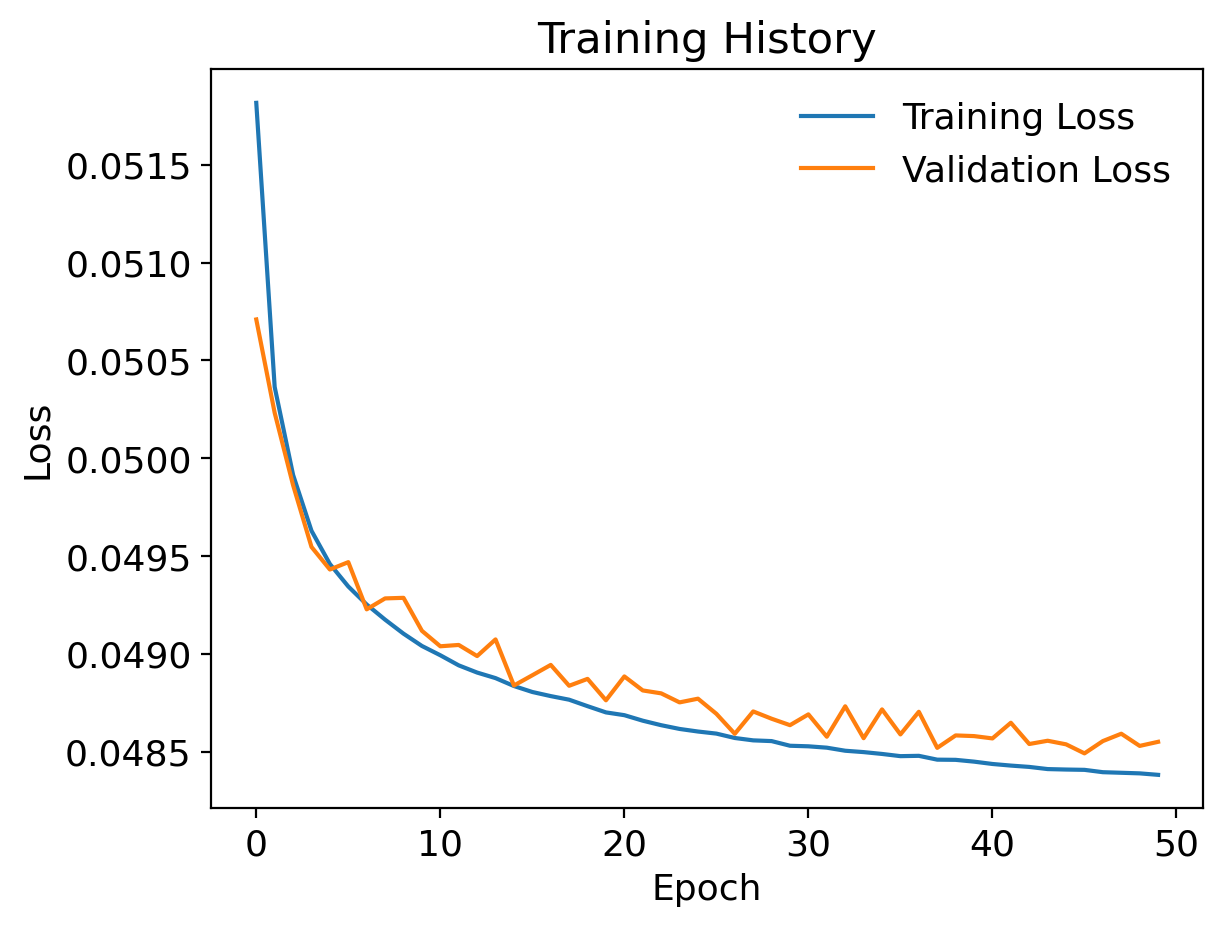

In [23]:
plot_history(train_losses, val_losses)

In [24]:
model_path = os.path.join(cwd,'saved_model')
make_dir(model_path)

In [25]:
# Save the entire model to a pth file.
torch.save(model, os.path.join(model_path, 'NN_model.pth'))

In [26]:
# reload the saved model
model = torch.load(os.path.join(model_path, 'NN_model.pth'), weights_only=False)
model.to(device).eval()

Sequential(
  (0): Linear(in_features=41, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=12, bias=True)
)

In [28]:
import numpy as np
import pandas as pd

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=minibatch_size, shuffle=False)

model.eval()
predictions = []
with torch.no_grad():
   for batch_X, in test_loader:
       batch_X = batch_X.to(device)
       outputs = model(batch_X)
       # Convert tensor outputs to CPU and then to list (avoid .numpy())
       predictions.append(outputs.cpu().tolist())

# Concatenate list-of-lists into a single list
import itertools
y_test_pre_list = list(itertools.chain.from_iterable(predictions))

# Convert to numpy array after concatenation
y_test_pre = np.array(y_test_pre_list)

cause_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
y_pred_df = pd.DataFrame(y_test_pre, columns=cause_names)


In [29]:
# After prediction and concatenation
y_test_pre = np.concatenate(predictions, axis=0)  # shape (num_samples, 12)

cause_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
y_pred_df = pd.DataFrame(y_test_pre, columns=cause_names)

In [30]:
y_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1290501,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1576289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2088222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Calculate RMSE

In [31]:
import numpy as np

# Flatten the DataFrames to 1D arrays (optional but commonly done)
true_values = y_test_df.values.flatten()
pred_values = y_pred_df.values.flatten()

# Calculate RMSE
rmse = np.sqrt(np.mean((true_values - pred_values) ** 2))
print(f'RMSE: {rmse}')


RMSE: 0.22024160886131883


# Make Confusion Matrix

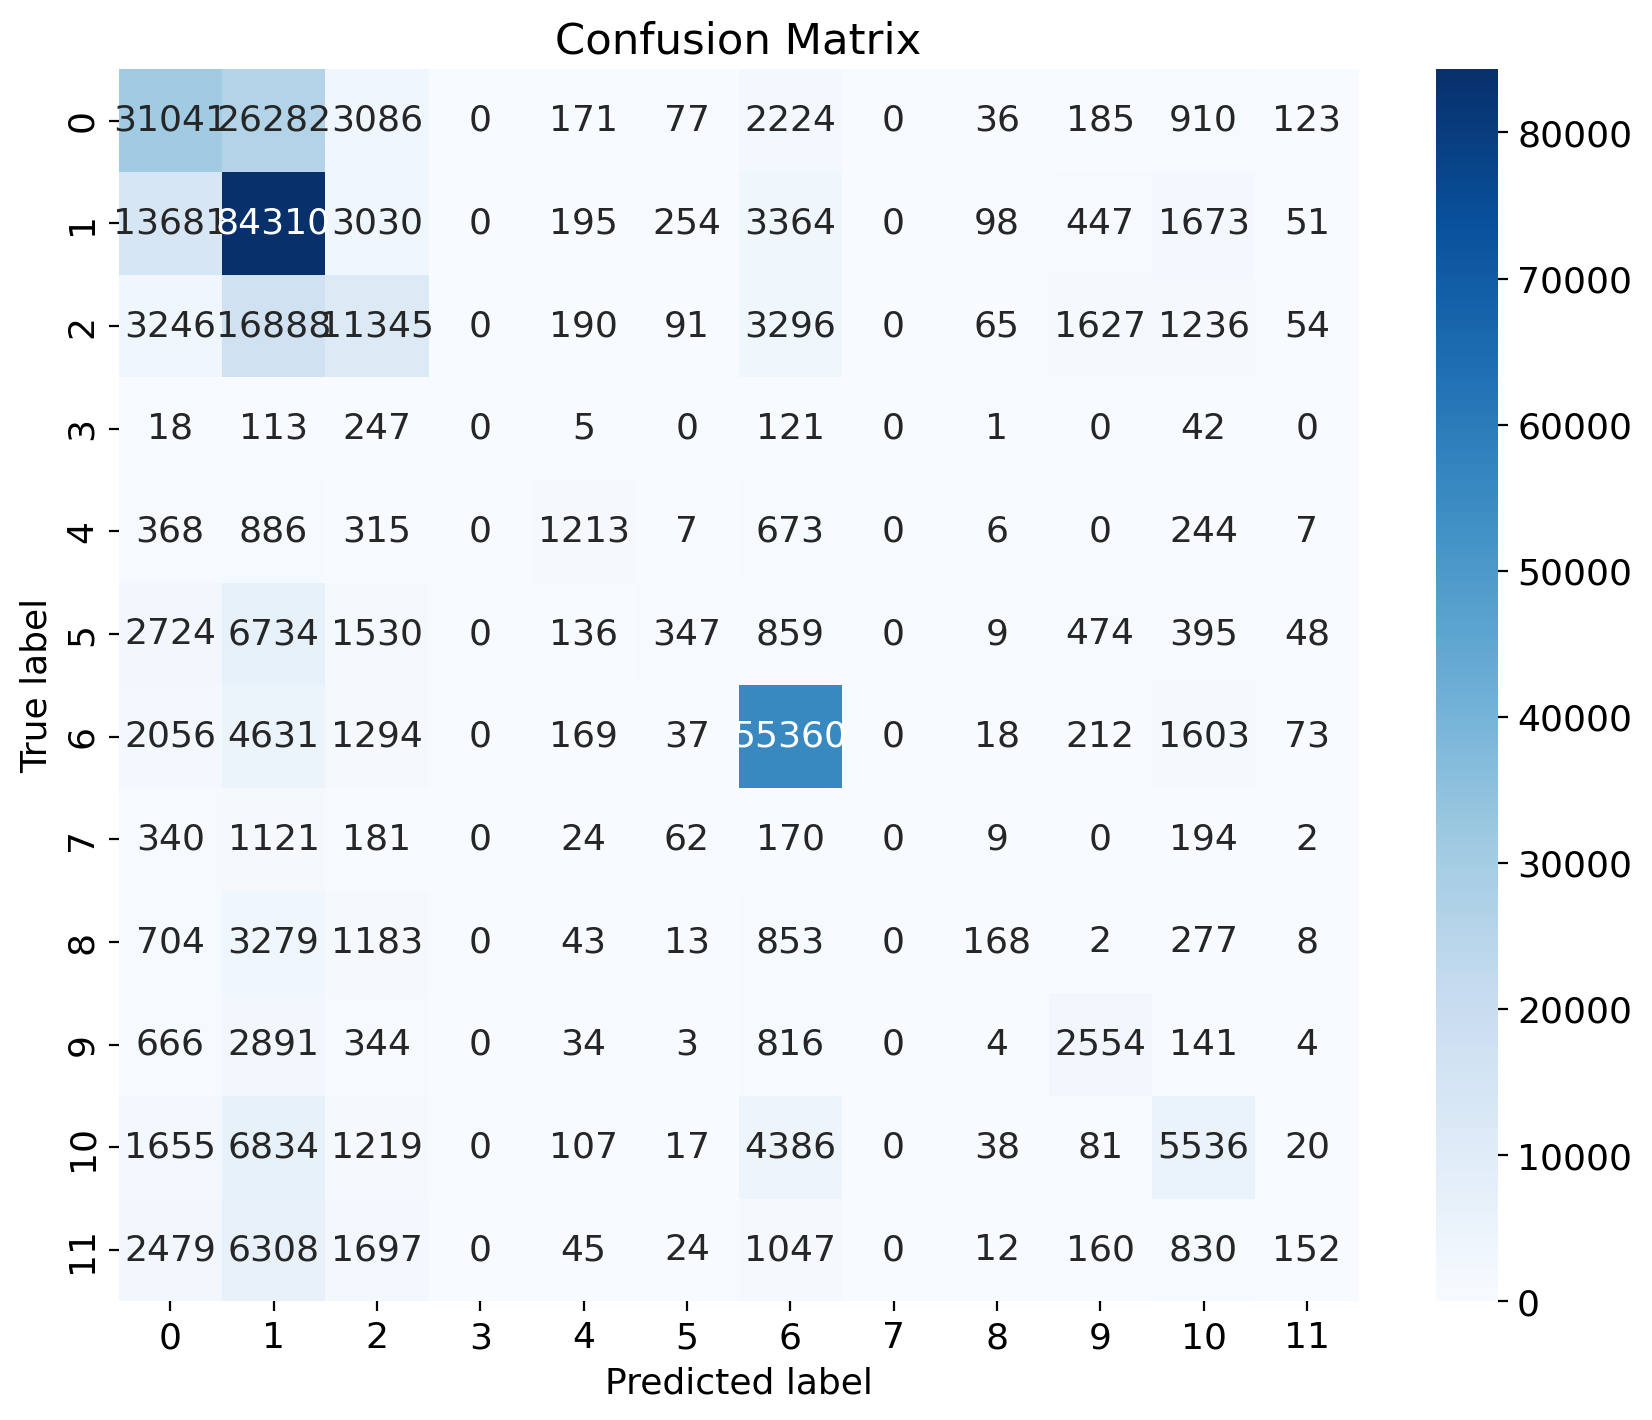

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# y_test_df and y_pred_df are your dataframes of shape (samples, 12)
# Each row: probabilistic assignment to each cause

# Get true and predicted cause labels by argmax across columns
y_true = np.argmax(y_test_df.values, axis=1)
y_pred = np.argmax(y_pred_df.values, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(12))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


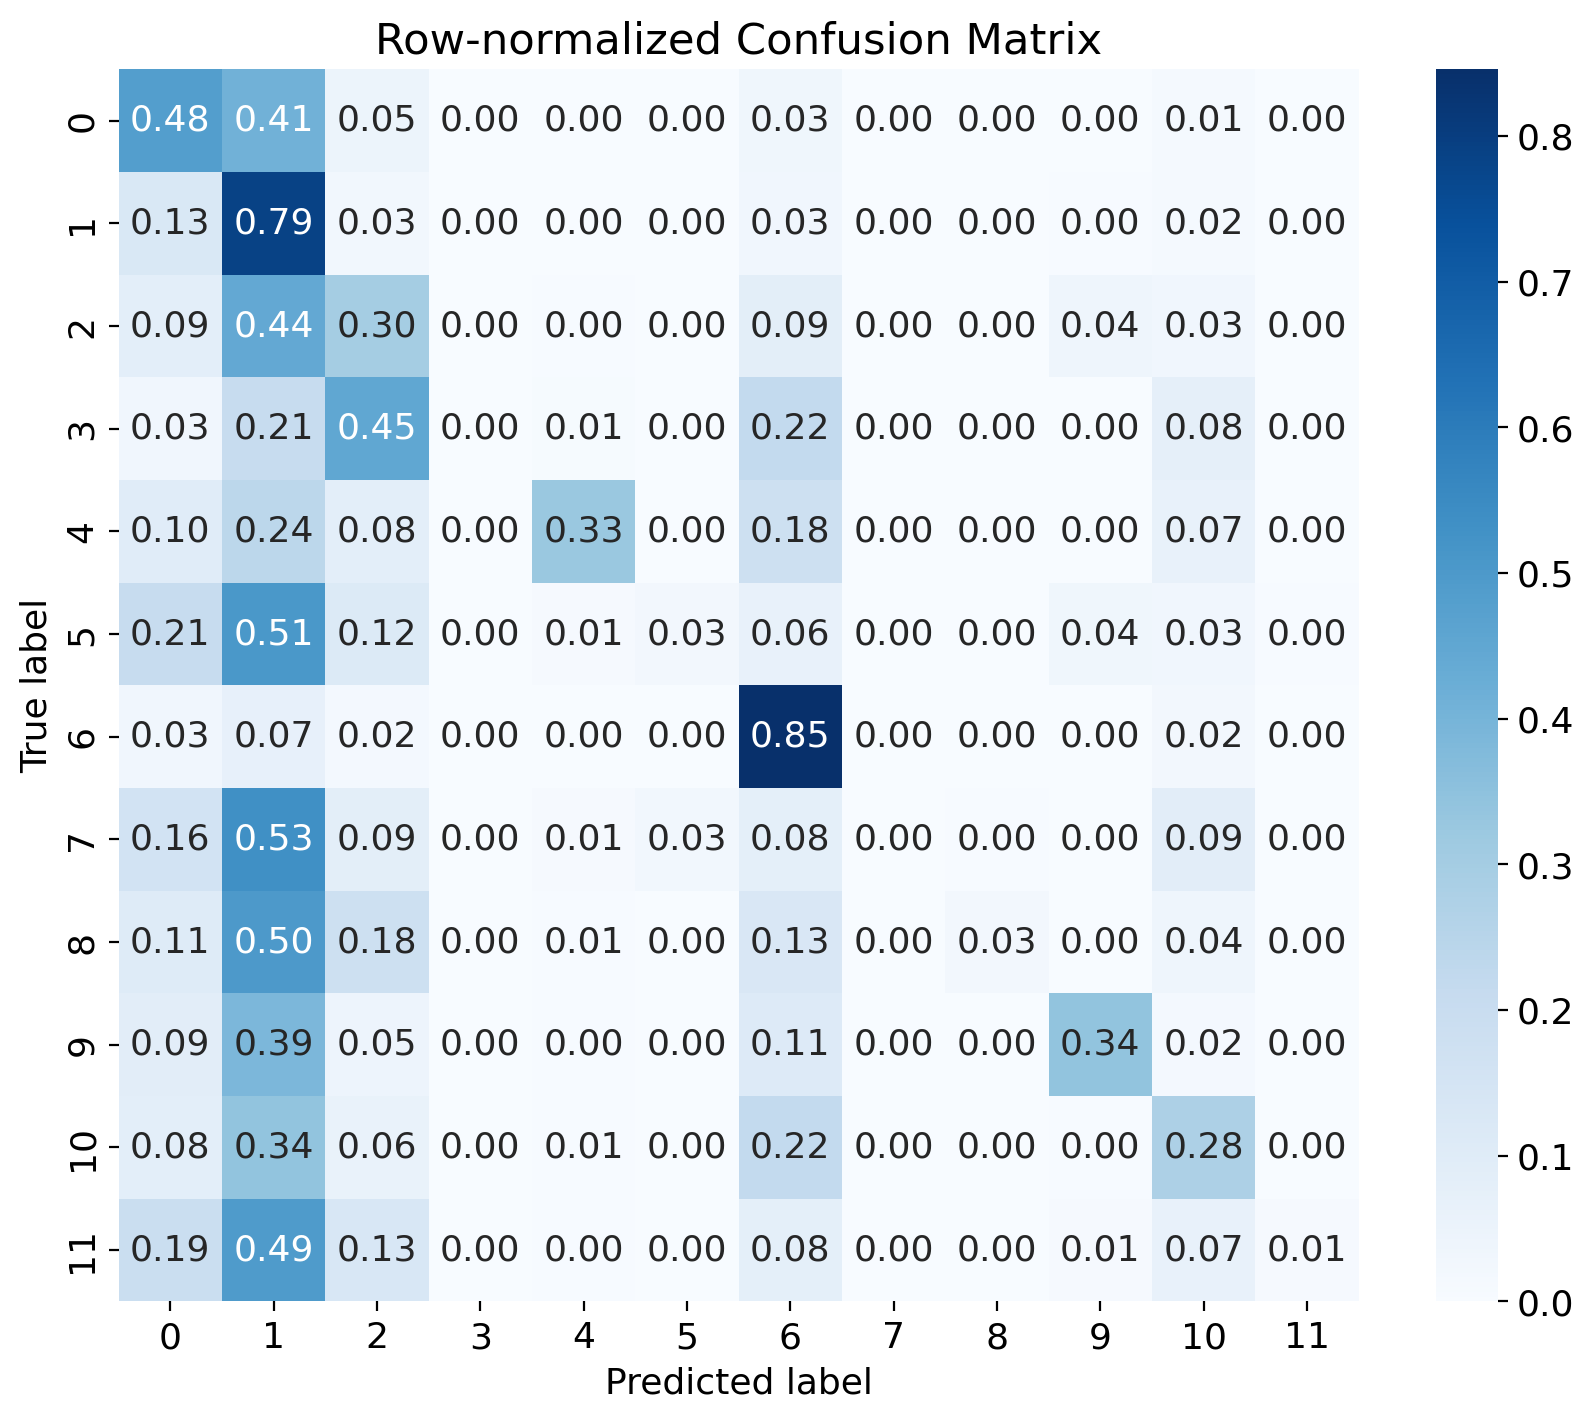

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# y_true and y_pred as before
y_true = np.argmax(y_test_df.values, axis=1)
y_pred = np.argmax(y_pred_df.values, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(12))

# Normalize so each row sums to 1 (handle zero rows to avoid division by zero)
row_sums = cm.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1  # avoid division by zero
cm_normalized = cm / row_sums

# Plot the normalized confusion matrix (values between 0 and 1)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=np.arange(12),
    yticklabels=np.arange(12)
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Row-normalized Confusion Matrix')
plt.show()


### Make Accuracy Matrix

In [35]:
# Calculate accuracy for each category (class-wise accuracy)
class_accuracies = cm.diagonal() / cm.sum(axis=1) *100

# Calculate overall accuracy
overall_accuracy = cm.diagonal().sum() / cm.sum()*100

# Create a DataFrame for better visualization
accuracy_table = pd.DataFrame({
    'Class': np.arange(12),
    'Class Accuracy': class_accuracies
})

# Append overall accuracy as a separate row
overall_row = pd.DataFrame({'Class': ['Overall'], 'Class Accuracy': [overall_accuracy]})
accuracy_table = pd.concat([accuracy_table, overall_row], ignore_index=True)

print(accuracy_table)

      Class  Class Accuracy
0         0       48.399470
1         1       78.718617
2         2       29.825438
3         3        0.000000
4         4       32.616295
5         5        2.617683
6         6       84.579775
7         7        0.000000
8         8        2.572741
9         9       34.249698
10       10       27.828885
11       11        1.191783
12  Overall       56.314592


In [45]:
#!pip install shap

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import shap


# nn = MLPClassifier(solver="lbfgs", alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0, max_iter=400)
# nn.fit(X_train, y_train)

# Predict on training or test data
y_pred = nn.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test_df, y_pred)
print(f"Accuracy: {acc:.4f}")

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

/Users/alexanderfeil/Desktop/studies/2 Master/2 Fall Term/machine learning/project/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy: 0.0000


Using 1363952 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/340988 [00:00<?, ?it/s]

: 